# Heatmap 
- using padj < 0.01 as the cutoff for the current analysis

In [20]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [21]:
library(ggplot2)
library(dplyr)
library(NMF)
library(RColorBrewer)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(glue)
library(rjson)

In [22]:
feat_df <- read.table("../../../output/annotations_MS1_MS2/PS_selected_full_report.csv"
        ,header = TRUE, sep = ',')

In [23]:
head(feat_df)

,X,mz,rtime,rtime_left_base,rtime_right_base,cSelectivity,goodness_fitting,snr,annotation_evidence,name,neutral_mass,formula,isomers,X.M.H.e.,gMean_Tn,gMean_CD8stem,gMean_CD8trans,gMean_CD8TD,log2FC_CD8stemvsTn,log2FC_CD8transvsTn,log2FC_CD8TDvsTn,log2FC_CD8transvsCD8stem,log2FC_CD8TDvsCD8stem,log2FC_CD8TDvsCD8trans,f_score,pval,padj,Tpadj_CD8TD.CD8stem,Tpadj_CD8trans.CD8stem,Tpadj_Tn.CD8stem,Tpadj_CD8trans.CD8TD,Tpadj_Tn.CD8TD,Tpadj_Tn.CD8trans,TFDR_CD8TD.CD8stem,TFDR_CD8trans.CD8stem,TFDR_Tn.CD8stem,TFDR_CD8trans.CD8TD,TFDR_Tn.CD8TD,TFDR_Tn.CD8trans,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F292,490.2552,33.72,32.23,35.88,1.00,0.94,1500,in-silico,LPS O-17:3,491.2648,C23H42NO8P,,490.2575,18.09097,20.75103,20.09084,18.85192,2.660056,1.999871,0.7609509,-0.66018515,-1.8991056,-1.23892046,7.152045,0.04379407,0.1895264,0.1247871,0.7378192,0.04528168,0.3361107,0.6576912,0.1080654,0.4670373,1,1,0.8623664,1.0000000,1,18.09097,19.61287,21.00701,20.49504,19.69267,20.48901,18.09097,18.09097,20.51256,20.59763,20.68273
2,F293,490.2552,205.14,202.53,207.68,1.00,0.85,466,in-silico,LPS O-17:3,491.2648,C23H42NO8P,,490.2575,17.31228,19.21286,19.23599,18.49961,1.900572,1.923702,1.1873270,0.02313048,-0.7132447,-0.73637520,2.026852,0.25268310,0.4648133,0.8536897,0.9999928,0.28672490,0.8425005,0.5961555,0.2796619,1.0000000,1,1,1.0000000,0.9600369,1,17.31228,19.68694,19.39185,19.03387,18.82899,19.64298,17.31228,17.31228,18.24089,18.86347,19.26423
3,F577,456.1422,87.55,84.81,89.94,0.30,0.92,6,in-silico,LPS 14:6,457.1502,C20H28NO9P,PS O-14:6|LPS O-14:7;O,456.1429,18.82082,12.96398,15.55845,15.59976,-5.856836,-3.262368,-3.2210586,2.59446770,2.6357773,0.04130965,1.681470,0.30714851,0.5114137,0.7546921,0.7624793,0.25542904,0.9999983,0.6421916,0.6342799,1.0000000,1,1,1.0000000,0.9932395,1,18.23553,12.96398,12.96398,12.96398,18.15292,12.96398,18.80920,18.83243,18.65070,12.96398,12.96398
4,F579,456.1422,115.37,112.63,118.00,0.34,0.90,5,in-silico,LPS 14:6,457.1502,C20H28NO9P,PS O-14:6|LPS O-14:7;O,456.1429,19.75253,12.24644,15.53404,15.59222,-7.506084,-4.218492,-4.1603094,3.28759286,3.3457750,0.05818213,1.718107,0.30059559,0.5064407,0.7543566,0.7630020,0.24979165,0.9999977,0.6309737,0.6222313,1.0000000,1,1,1.0000000,0.9839430,1,18.93799,12.24644,12.24644,12.24644,18.82163,12.24644,19.84404,19.66102,20.10191,12.24644,12.24644
5,F580,456.1422,119.74,118.22,121.28,0.34,0.96,6,in-silico,LPS 14:6,457.1502,C20H28NO9P,PS O-14:6|LPS O-14:7;O,456.1429,19.07797,11.76777,13.94984,15.53185,-7.310201,-5.128130,-3.5461230,2.18207117,3.7640784,1.58200723,1.997865,0.25668518,0.4676694,0.6470671,0.8891050,0.22452189,0.9515375,0.6827490,0.4421071,1.0000000,1,1,1.0000000,1.0000000,1,19.29593,11.76777,11.76777,11.76777,16.13191,11.76777,18.85909,19.29686,19.48890,11.76777,11.76777
6,F584,456.1422,169.78,167.16,172.40,0.30,0.89,4,in-silico,LPS 14:6,457.1502,C20H28NO9P,PS O-14:6|LPS O-14:7;O,456.1429,18.81434,14.35978,16.32996,15.84454,-4.454557,-2.484379,-2.9698026,1.97017783,1.4847541,-0.48542375,2.150127,0.23665001,0.4508080,0.8381387,0.7070694,0.19992386,0.9919241,0.4429482,0.5639395,1.0000000,1,1,1.0000000,0.8256079,1,17.32929,14.35978,14.35978,14.35978,18.30014,14.35978,18.27175,19.35693,17.59702,14.35978,14.35978


In [24]:
feat_df = feat_df[!duplicated(feat_df$X),]

In [25]:
dim(feat_df)

[1] 803  50

In [26]:
library(dplyr)

feat_df = feat_df %>%
  mutate(surrogate = paste(name, round(rtime,2), sep = "_"))

rownames(feat_df) = feat_df$surrogate

In [27]:
rownames(feat_df)[1:5]

[1] "LPS O-17:3_33.72"  "LPS O-17:3_205.14" "LPS 14:6_87.55"   
[4] "LPS 14:6_115.37"   "LPS 14:6_119.74"

In [28]:
meta_df <- read.table("../../../../seq/RPneg_addgrp.csv",
                     header = TRUE, sep = ',') 

In [29]:
head(meta_df,5)

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
1,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
2,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
3,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A2,2
4,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
5,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2


In [30]:
sample_names = colnames(feat_df)[grepl('(Tn|CD8stem|CD8TD|CD8trans)\\_[0-9]+',colnames(feat_df))]
sample_names
length(sample_names)
padj_columns = colnames(feat_df[grepl('padj',colnames(feat_df))]);padj_columns

[1] "CD8TD_750K_1"    "CD8TD_750K_2"    "CD8stem_250K_1"  "CD8stem_300K_2" 
[5] "CD8trans_250K_2" "CD8trans_350K_1" "Tn_250K_1"       "Tn_250K_2"

[1] 8

[1] "padj"                   "Tpadj_CD8TD.CD8stem"    "Tpadj_CD8trans.CD8stem"
[4] "Tpadj_Tn.CD8stem"       "Tpadj_CD8trans.CD8TD"   "Tpadj_Tn.CD8TD"        
[7] "Tpadj_Tn.CD8trans"

In [31]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [32]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[meta_df$Sample_ID_upd %in% sample_names,]

# Define filtering level - pval

In [33]:
filtered_level = 0.05
feat_df.filt = feat_df[feat_df$pval < filtered_level & !is.na(feat_df$pval),]

In [34]:
dim(feat_df.filt)

[1] 158  51

## subset datatable with only data values

In [35]:
feat_df.filt.data = feat_df.filt[sample_names]

# Plot heatmap wrapper function

In [36]:
feat_df.filt.data.scale <- t(scale(t(feat_df.filt.data)))

In [37]:
range(feat_df.filt.data.scale, na.rm = TRUE)

[1] -2.131365  2.187495

#### columns and rows annotation

In [38]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [39]:
unique(meta_df$group)

[1] "Tn"       "CD8stem"  "CD8trans" "CD8TD"

## Since the metadata is not exclusively the data 

In [40]:
rownames(meta_df) = meta_df$Sample_ID_upd

In [41]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[sample_names,]

In [42]:
assign_values4annot <- function(df = feat_df.filt.data.scale, 
                                meta_column_name = 'group') {  
    Var_vec = colnames(df)
    for (factor_level in unique(meta_df[,meta_column_name])) {
        Var_vec[Var_vec %in% 
                 rownames(meta_df[meta_df[,meta_column_name] == factor_level,])] = factor_level
        }
    return(Var_vec)
}

In [43]:
Var1_vec = assign_values4annot(feat_df.filt.data.scale, 'group')

In [44]:
annotation_col = data.frame(group = Var1_vec)
rownames(annotation_col) = colnames(feat_df.filt.data.scale)                            

# annotation_col = data.frame(illness_duration = Var1_vec, 
#                             gender = Var2_vec, 
#                             age = Var3_vec)
# rownames(annotation_col) = colnames(feat_df.filt.data.scale)

In [45]:
# since age is continuous measure (integers), needs to convert to integers
# annotation_col$age = as.integer(annotation_col$age)

In [46]:
annotation_col$group

[1] "CD8TD"    "CD8TD"    "CD8stem"  "CD8stem"  "CD8trans" "CD8trans" "Tn"      
[8] "Tn"

#### Annotation of rows (here don't have these)

In [47]:
# panel_vec = sapply(strsplit(rownames(feat_df.filt.data.scale),"_",1),function(x)x[1])
# annotation_row = data.frame(panel = panel_vec) 
# rownames(annotation_row) = rownames(feat_df.filt.data.scale)

## Assign colors

In [48]:
group = c("#888888","#0000ff","#FFA500","#ff0000")
names(group) = c("Tn","CD8stem","CD8trans","CD8TD")

# gender = c("#FF7A33", "#33D7FF")
# names(gender) = c("Female","Male")

In [49]:
ann_colors = list(group = group)
# ann_colors = list(illness_duration = illness_duration, 
#                   gender = gender,
#                   age = age
#                  )

In [50]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -2.131365  2.187495

In [51]:
feat_df.filt.data.scale[feat_df.filt.data.scale < -2] = -2.1
feat_df.filt.data.scale[feat_df.filt.data.scale > 2] = 2.1

In [52]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -2.1  2.1

In [53]:
breaksList = seq(range(feat_df.filt.data.scale)[1],
                 range(feat_df.filt.data.scale)[2],
                 length.out = 100) 

quantile_breaks <- function(xs, n = 100) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(feat_df.filt.data.scale, n = 101)
cell_colors <- colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(length(mat_breaks))

In [54]:
# options(repr.plot.width=30, repr.plot.height=30, res=300)
# pheatmap(feat_df.filt.data.NA.scale.rplNAmin, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, 
#          annotation_col = annotation_col, annotation_row = annotation_row, clustering_method = "complete", 
#          cellwidth = 5,cellheight = 10, annotation_colors = ann_colors,
#          color = cell_colors)

In [60]:
out_dir = "../../../output/heatmap_in_silico/"
dir.create(out_dir)

exp_label = 'hMinImp_TICnorm_HILICpos_1wayANOVA'
out_pdf_file = file.path(out_dir, glue("{exp_label}_pval{filtered_level}_heatmap.pdf"))

In [61]:
ann_colors

$group
       Tn   CD8stem  CD8trans     CD8TD 
"#888888" "#0000ff" "#FFA500" "#ff0000"

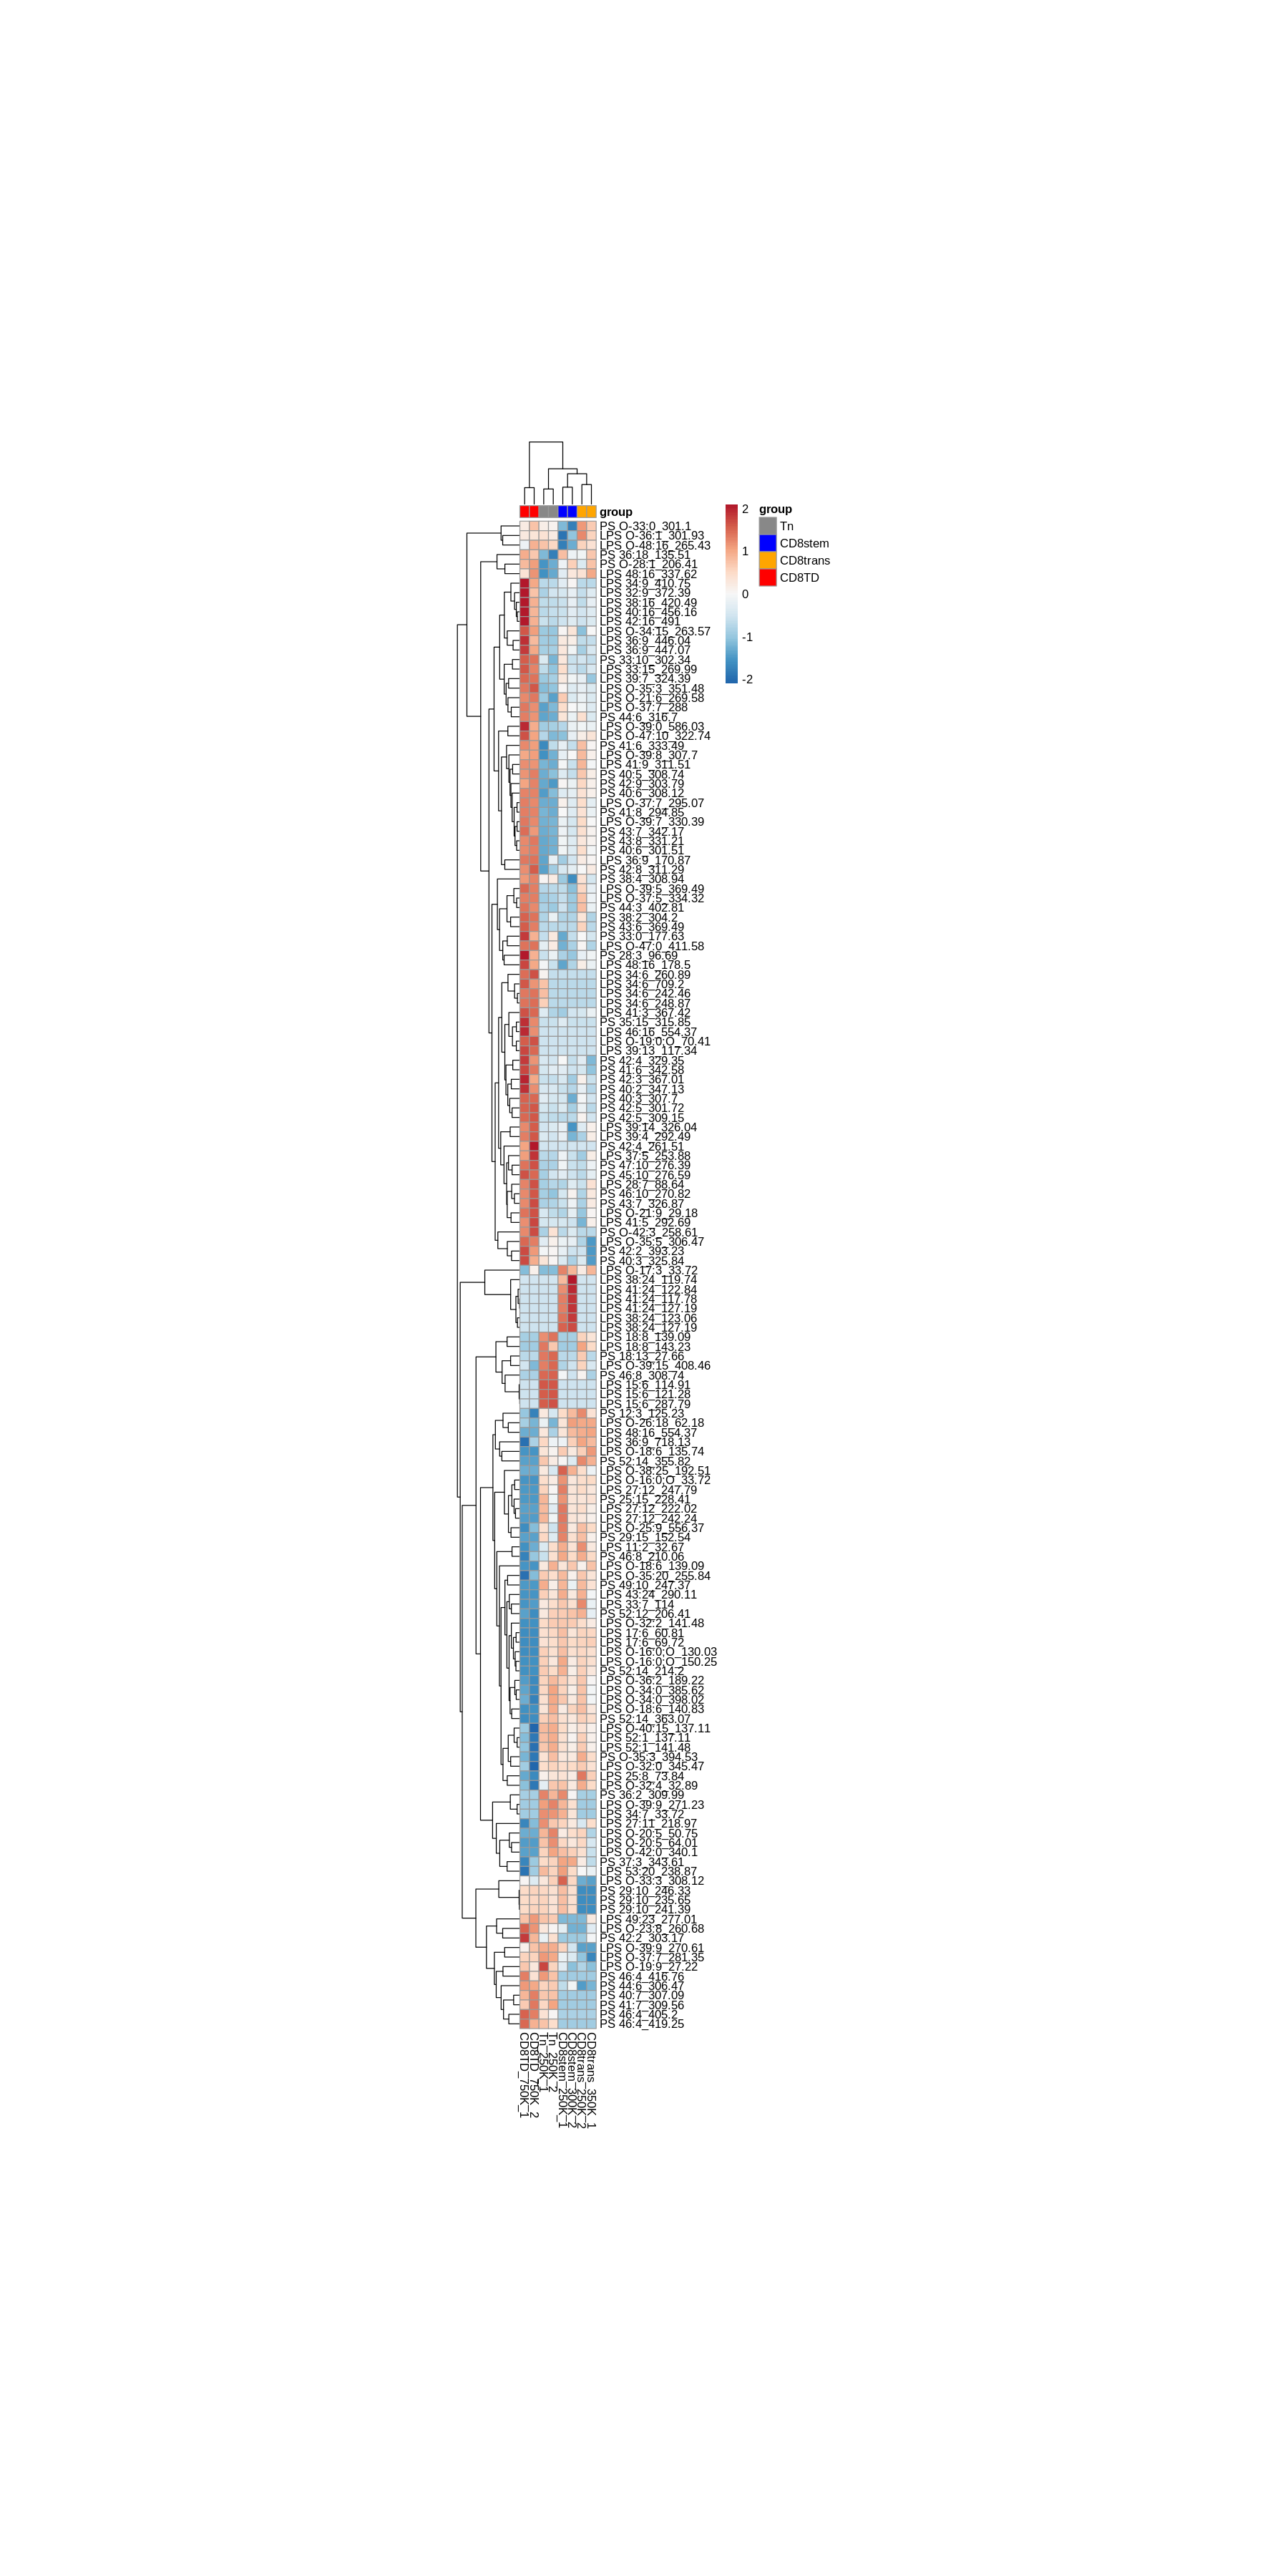

In [62]:
figure_width = 15
figure_height = 30
options(repr.plot.width = figure_width, repr.plot.height = figure_height, res = 300)
library(pheatmap)
p <- pheatmap(feat_df.filt.data.scale,  # data file
         cluster_rows = TRUE, 
         show_rownames = TRUE, 
         cluster_cols = TRUE, 
         annotation_col = annotation_col, 
         clustering_method = "mcquitty",
         cellwidth = 8,
         cellheight = 8,
         color = cell_colors,
         annotation_colors = ann_colors)
ggsave(p, file = out_pdf_file, width = figure_width, height = figure_height, )

-----